In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [74]:
df1 = pd.read_excel(r"C:\Users\lenovo\OneDrive\Desktop\BIT\Python\Datasets\Flight_Price Dataset\Data_Train.xlsx")

In [75]:
df2 = pd.read_excel(r"C:\Users\lenovo\OneDrive\Desktop\BIT\Python\Datasets\Flight_Price Dataset\Test_set.xlsx")

In [76]:
df = df1.append(df2)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10864\281634162.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [77]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [78]:
df.shape

(13354, 11)

In [79]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [80]:
df['Date_of_Journey'].str.split('/').str[0]

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [81]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [82]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [84]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [86]:
df.drop(['Date_of_Journey'] , axis = 1 , inplace = True)

In [87]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [88]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [89]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Min'] = df['Arrival_Time'].str.split(':').str[1]

In [90]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_Hour     13354 non-null  object 
 14  Arrival_Min      13354 non-null  object 
dtypes: float64(1), int32(3), object(11)
memory usage: 1.5+ MB


In [92]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Min'] = df['Arrival_Min'].astype(int)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_Hour     13354 non-null  int32  
 14  Arrival_Min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [94]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [95]:
df.drop(['Arrival_Time'] , axis = 1 , inplace = True)

In [96]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [97]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_Min'] = df['Dep_Time'].str.split(':').str[1]

In [98]:
df['Dep_Hour'] = df['Dep_Hour'].astype(int)
df['Dep_Min'] = df['Dep_Min'].astype(int)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_Hour     13354 non-null  int32  
 13  Arrival_Min      13354 non-null  int32  
 14  Dep_Hour         13354 non-null  int32  
 15  Dep_Min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(8)
memory usage: 1.4+ MB


In [100]:
df.drop(['Dep_Time'] , axis = 1 , inplace = True)

In [101]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [102]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [103]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0 , '2 stops':1 , '1 stop':2 , '4 stops':3 , 'nan':0 , '3 stop':4})

In [104]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13297 non-null  float64
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_Hour     13354 non-null  int32  
 12  Arrival_Min      13354 non-null  int32  
 13  Dep_Hour         13354 non-null  int32  
 14  Dep_Min          13354 non-null  int32  
dtypes: float64(2), int32(7), object(6)
memory usage: 1.3+ MB


In [106]:
df.drop(['Route'] , axis = 1 , inplace = True)

In [107]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50


In [108]:
df['Duration_Hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [109]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [110]:
df[df['Duration'] == '5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
6474,Air India,Mumbai,Hyderabad,5m,1.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,1.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [111]:
df.drop(6474 , axis = 0 , inplace = True)
df.drop(2660 , axis = 0 , inplace = True)

In [112]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13294 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int32  
 8   Month            13351 non-null  int32  
 9   Year             13351 non-null  int32  
 10  Arrival_Hour     13351 non-null  int32  
 11  Arrival_Min      13351 non-null  int32  
 12  Dep_Hour         13351 non-null  int32  
 13  Dep_Min          13351 non-null  int32  
 14  Duration_Hour    13351 non-null  object 
dtypes: float64(2), int32(7), object(6)
memory usage: 1.3+ MB


In [114]:
df['Duration_Hour'] = df['Duration_Hour'].astype(int)

In [115]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,1.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,1.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,2.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,2.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [116]:
df.drop(['Duration'],axis=1,inplace=True)

In [117]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,1.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,1.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,IndiGo,Kolkata,Banglore,2.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,IndiGo,Banglore,New Delhi,2.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Total_Stops      13294 non-null  float64
 4   Additional_Info  13351 non-null  object 
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   Year             13351 non-null  int32  
 9   Arrival_Hour     13351 non-null  int32  
 10  Arrival_Min      13351 non-null  int32  
 11  Dep_Hour         13351 non-null  int32  
 12  Dep_Min          13351 non-null  int32  
 13  Duration_Hour    13351 non-null  int32  
dtypes: float64(2), int32(8), object(4)
memory usage: 1.1+ MB


In [119]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [120]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [121]:
df['Airline'] = labelencoder.fit_transform(df['Airline'])
df['Source'] = labelencoder.fit_transform(df['Source'])
df['Destination'] = labelencoder.fit_transform(df['Destination'])
df['Additional_Info'] = labelencoder.fit_transform(df['Additional_Info'])

In [122]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,1.0,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,1.0,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,2.0,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,2.0,8,13302.0,1,3,2019,21,35,16,50,4


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Total_Stops      13294 non-null  float64
 4   Additional_Info  13351 non-null  int32  
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   Year             13351 non-null  int32  
 9   Arrival_Hour     13351 non-null  int32  
 10  Arrival_Min      13351 non-null  int32  
 11  Dep_Hour         13351 non-null  int32  
 12  Dep_Min          13351 non-null  int32  
 13  Duration_Hour    13351 non-null  int32  
dtypes: float64(2), int32(12)
memory usage: 938.7 KB


In [124]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,1.0,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,1.0,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,2.0,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,2.0,8,13302.0,1,3,2019,21,35,16,50,4


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int32  
 1   Source           13351 non-null  int32  
 2   Destination      13351 non-null  int32  
 3   Total_Stops      13294 non-null  float64
 4   Additional_Info  13351 non-null  int32  
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int32  
 7   Month            13351 non-null  int32  
 8   Year             13351 non-null  int32  
 9   Arrival_Hour     13351 non-null  int32  
 10  Arrival_Min      13351 non-null  int32  
 11  Dep_Hour         13351 non-null  int32  
 12  Dep_Min          13351 non-null  int32  
 13  Duration_Hour    13351 non-null  int32  
dtypes: float64(2), int32(12)
memory usage: 938.7 KB


<Figure size 1500x1500 with 0 Axes>

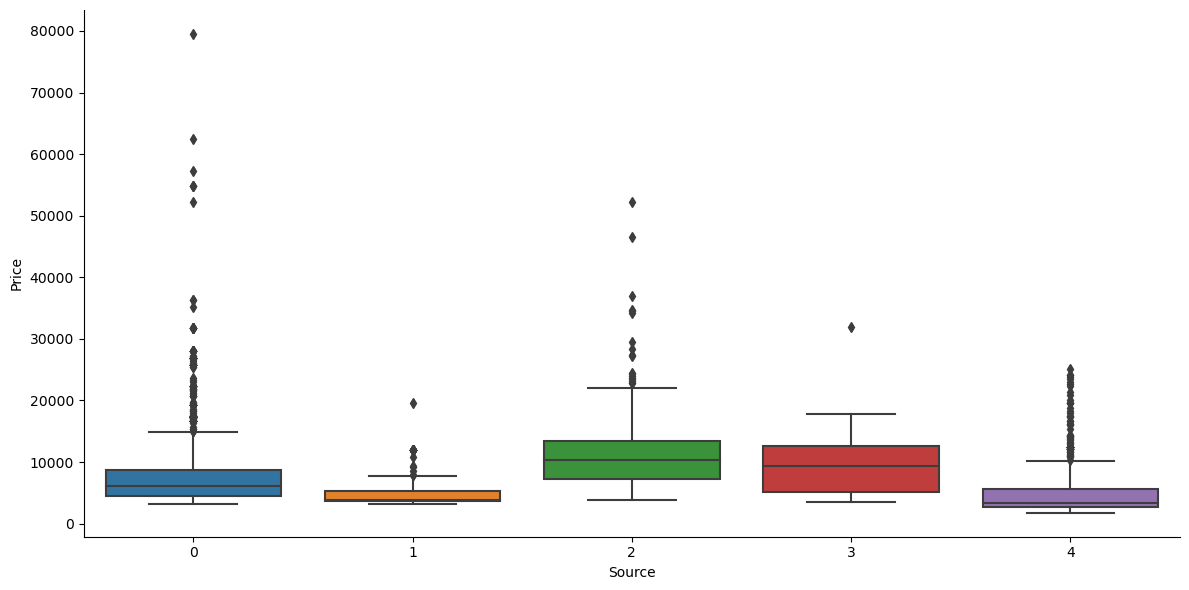

In [126]:
plt.figure(figsize = (15,15))
sns.catplot(y = 'Price' , x = 'Source' , data =df.sort_values("Price" , ascending = True) , kind = 'box' , height = 6 , aspect = 2)

<Figure size 1200x1200 with 0 Axes>

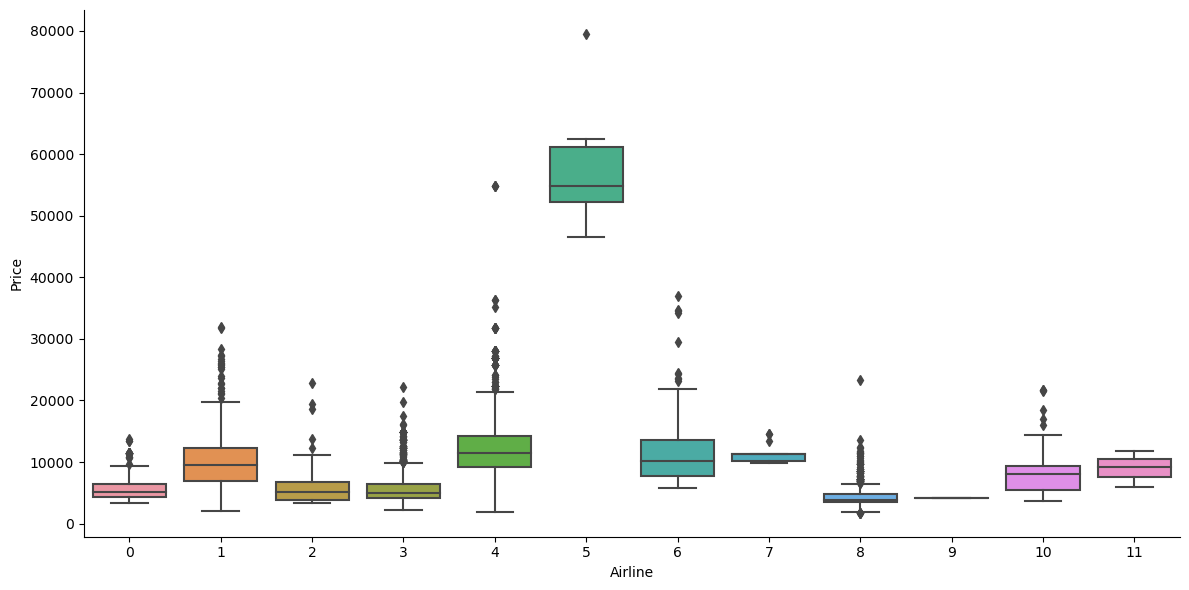

In [127]:
plt.figure(figsize = (12,12))
sns.catplot(y = 'Price' , x = 'Airline' , data = df.sort_values('Price' , ascending = False) , kind = 'box' , height = 6 , aspect = 2)

<Figure size 1200x1200 with 0 Axes>

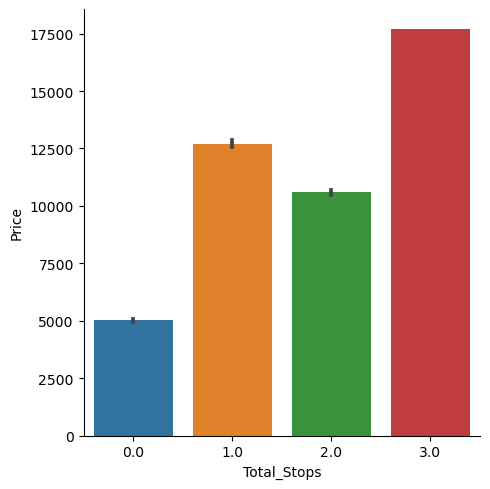

In [128]:
plt.figure(figsize = (12,12))
sns.catplot(y = "Price" , x ='Total_Stops' , data = df.sort_values("Price" , ascending = False) , kind = 'bar' , height = 5 , aspect = 1)